In [1]:
using Hokusai
Hokusai.readdata!();

computing out/img6 n7 tau100 sigma50 methodscaling precl300 symmfalse.png 
saving image

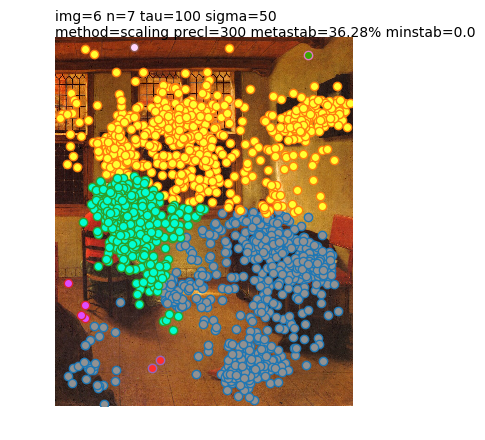

In [2]:
# single computation
Hokusai.savecl(6, 7, 100, 50, precl = 300, overwrite=true);

In [ ]:
#TODO: fix
# interactive plotting
using Interact
#PyPlot.ion()
f = PyPlot.figure()
@manipulate for img=1, n=10, tau=50, sigma=60, method = [:scaling, :crispness, :metastability], precl = 200, live = [:on, :off]
    PyPlot.withfig(f) do
        if (live == :on)
            result = Hokusai.savecl(img, n, tau, sigma, method = method, precl = precl, overwrite=true);
        end
    end
end

In [ ]:
# simple batch script
for i=[7], n=[11], tau=[80,100,120], σ=[50,60,80,100,120], method=[:scaling], precl=0   
    @time Hokusai.savecl(i, n, tau, σ, method = method, precl = precl);
    PyPlot.close()
end;

In [ ]:
# compute clusterings for comparison with kmeans

clusternums = [5,5,7,7,6,7,7,8]; # clusternumbers from manual classification
imgs = [1:8]
τs = [60,80,100]
σs=[60,80,100,120]

run = 0
runs = length(imgs) * 3 * length(τs) * length(σs)

for img=imgs, n=[clusternums[img]-1:clusternums[img]+1], τ=τs, σ=σs, method=[:scaling], precl=1000
    run+=1; print(run," of ",runs,": ")
    
    Hokusai.savecl(img,n,0,0,:scaling,0,kmeans=true, folder="out/km");
    PyPlot.close()
    time = @elapsed Hokusai.savecl(img, n, τ, σ, method=method, precl=precl, folder="kmeanscomp");
    PyPlot.close()
    
    print(((runs-run)*time/60)," minutes remaining at ", time, " seconds per run\n")    
end;

In [ ]:
# bachelor plots
parms = [ # i n t s
1 5 20 35
1 6 50 60
1 10 60 50

5 6 100 250
5 7 80 120
5 9 80 120
    
7 6 80 80 
7 8 80 80
7 10 80 100]
         
for i = 1 : size(parms,1)
    Hokusai.savecl(parms[i,1], parms[i,2], parms[i,3], parms[i,4], folder="ba")
    PyPlot.close()
end

In [ ]:
# testcode for optimization of sigma/tau by metastability
img = 5
n = 6
precl = 200

function obj(args)
    ms = -minimum(diag(coupling(Hokusai.savecl(img,n,args[1]*10,args[2]*10,precl=precl,folder="optim",overwrite=true))))
    
    PyPlot.close()
    PyPlot.show()
    ms = ms == NaN ? 0 : ms
    ms
end

using Optim
optimize(obj, [10.,10.], method=:nelder_mead, show_trace=true, iterations=10);

In [ ]:
# metastudy of metastbailities given a df with results, which is missing here :|, feel free to remove
nanmean(x) = mean(x[ x.>0 ])

filtered = df[ df[:,:tau].>0,: ]

aggr = by(filtered, [:img, :n]) do df
    DataFrame(
        samples = size(df,1),
        meanmetastab   =  round(nanmean(df[:metastab]),1),
        maxminmetastab = (round(maximum(df[:metastab]),1), round(minimum(df[:metastab]),1)),
        meanminstab    =  round(nanmean(df[:minstab]),1),
        maxminminstab  = (round(maximum(df[:minstab]),1),  round(minimum(df[:minstab]),1)))
end

sort!(aggr, cols = [:img, :n])